# Lab 2 Cross validation

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Lab2.csv')

In [3]:
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8
0,173,73.6,1,4.0,1.0,21,1,2,1
1,185,72.0,1,3.0,2.0,20,1,7,0
2,135,65.0,0,2.0,4.0,20,1,2,0
3,127,64.0,0,3.0,2.0,20,1,4,0
4,135,68.0,1,4.0,3.0,20,1,4,0


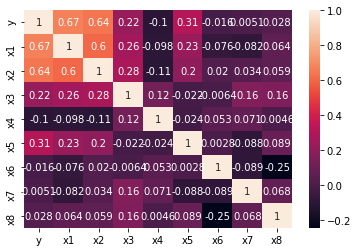

In [4]:
sn.heatmap(df.corr(),annot=True)
plt.show()

In [5]:
def cv_split(dataset, p):
    shuffled = dataset.sample(frac=1)
    result = np.array_split(shuffled,p)
    
    return result

In [11]:
def cv_calculation(p,df):
    result = cv_split(df,p)
    sse_1 =0
    sse_2=0
    for i in range(p):
        r = list(range(p))
        r.pop(i)
        for j in r:
            if j == r[0]:
                cv = result[j]
            else:
                cv = np.concatenate((cv,result[j]),axis=0)
        model_short = LinearRegression().fit(cv[:,1:3],cv[:,0])
        y_short_pred = model_short.predict(result[i].iloc[:,1:3])
        sse_i = ((y_short_pred - result[i].iloc[:,0]) ** 2).sum()
        #print('sse value for model with two features:', sse_i)
        sse_1 = sse_1 + sse_i

        model_large = LinearRegression().fit(cv[:,1:],cv[:,0])
        y_large_pred = model_large.predict(result[i].iloc[:,1:])
        sse_i2 = ((y_large_pred - result[i].iloc[:,0]) ** 2).sum()
        #print('SSE value for model with eight features:', sse_i2)
        sse_2 = sse_2 + sse_i2

    print('SSEcv value for model with two features:', sse_1)
    print('SSEcv value for model with eight features:', sse_2)
    
    
    

The lowest SSEcv value is for the first model with two features which makes it the best model  to choose, this result is consistent with correlation of the features used ploted above. 

In [12]:
cv_calculation(10,df)

SSEcv value for model with two features: 25913.3313972019
SSEcv value for model with eight features: 30967.631389480615


In [13]:
for i in range(20):
    print('Results for iteration',i)
    cv_calculation(10,df)

Results for iteration 0
SSEcv value for model with two features: 24773.672567007896
SSEcv value for model with eight features: 30595.793163242677
Results for iteration 1
SSEcv value for model with two features: 25768.90457189428
SSEcv value for model with eight features: 28328.689491724686
Results for iteration 2
SSEcv value for model with two features: 25796.00055056626
SSEcv value for model with eight features: 31716.99494989903
Results for iteration 3
SSEcv value for model with two features: 26198.54124332576
SSEcv value for model with eight features: 31706.032251731936
Results for iteration 4
SSEcv value for model with two features: 24698.00612970379
SSEcv value for model with eight features: 29564.570729837247
Results for iteration 5
SSEcv value for model with two features: 25461.608587231265
SSEcv value for model with eight features: 30005.564611852187
Results for iteration 6
SSEcv value for model with two features: 25445.348168844586
SSEcv value for model with eight features: 30